In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the data
credit_risk= pd.read_csv("UCI_Credit_Card.csv")
credit_risk.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
### Here I am doing to copy the original data in data frame called df.
df= credit_risk.copy()
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
#Information of the data
# Lets see the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

We are working with a data set containing 25 features for 30,000 clients. "default.payment.next.month" is a feature and is the target variable we are trying to predict.

In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1
29999,30000,50000.0,1,2,1,46,0,0,0,0,...,36535.0,32428.0,15313.0,2078.0,1800.0,1430.0,1000.0,1000.0,1000.0,1


Explanatory Data Analysis

In [ ]:
#checkking number of rows and columns
df.shape

(30000, 25)

In [ ]:
#checking for missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

We do not find any missing values in our data set.

In [ ]:
#Checking dublicates
df.duplicated(subset=None,keep='last')

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [ ]:
#checking data types
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [ ]:
# As we seen Column ID has no meaning here so, we will remove it
df.drop(["ID"], axis=1, inplace= True) #axis=1 -- column removal and inplcae= True --means change in the original data

In [ ]:
# Lets check the statistics of data
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#Analysis of column "EDUCATION"
####EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

In [ ]:
# Lets see the value counts in EDUCATION columns:
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [ ]:
# From the Data Description given, we know that in df.EDUCATION, 5 and 6 represents "unknown"
#Changing 0,5 and 6 to keep it under 1 category.

df['EDUCATION'].replace({0:1,1:1,2:2,3:3,4:4,5:1,6:1}, inplace=True)
df.EDUCATION.value_counts()

EDUCATION
2    14030
1    10930
3     4917
4      123
Name: count, dtype: int64

#Aalysis of column "MARRIAGE"
####Marital status (1=married, 2=single, 3=others)

In [ ]:
# lets see the values count in column marriage
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [ ]:
# Here I am going to map 0 with 1
df['MARRIAGE'].replace({0:1,1:1,2:2,3:3}, inplace=True)
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13713
3      323
Name: count, dtype: int64

#Analysis of column "PAY_0 to PAY_6"
####PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

In [ ]:
# Lets see the value counts in column 'PAY_0'
df['PAY_0'].value_counts()

PAY_0
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: count, dtype: int64

#Data Visualization

So, By looking at the target varibale we could say that, our data is pretty much imbalance. We would like to make it balanced before going to trained the model.

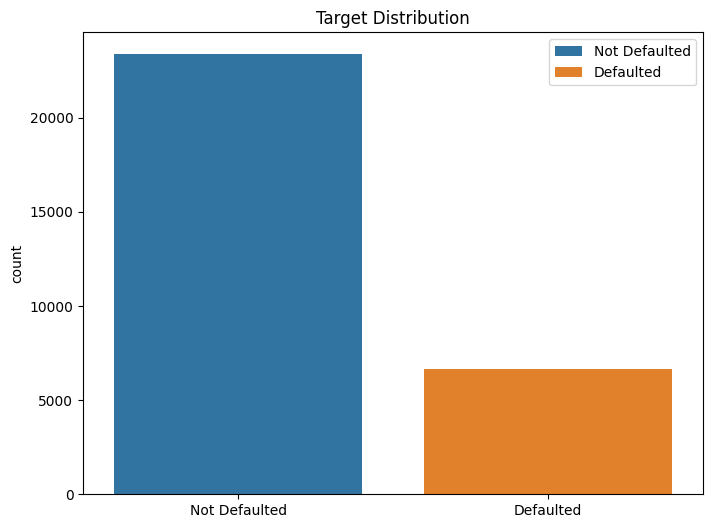

In [ ]:
plt.figure(figsize=(8, 6))

# Plot countplot for both categories
sns.countplot(data=df, x='default.payment.next.month', hue='default.payment.next.month')
plt.xticks([0, 1], ['Not Defaulted', 'Defaulted'])
plt.title('Target Distribution')
plt.xlabel('')
plt.legend(['Not Defaulted', 'Defaulted'])

plt.show()

In [ ]:
# Lets count it
df['default.payment.next.month'].value_counts()

default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

We need to make this imbalanced data into balanced data before train the model.

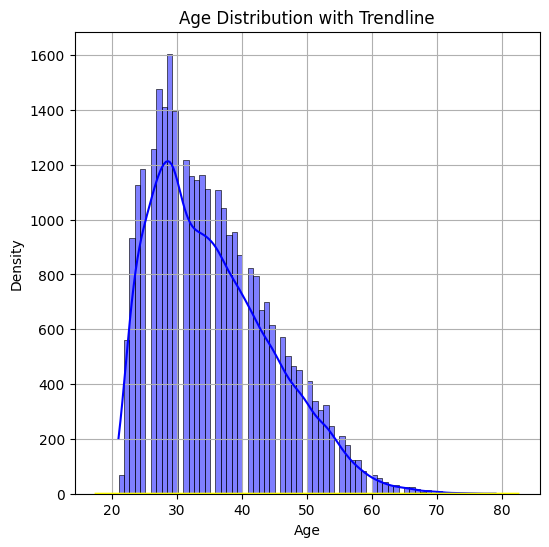

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(df['AGE'], kde=True, color='blue', edgecolor='black')
sns.kdeplot(df['AGE'], color='yellow')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution with Trendline')
plt.grid(True)
plt.show()


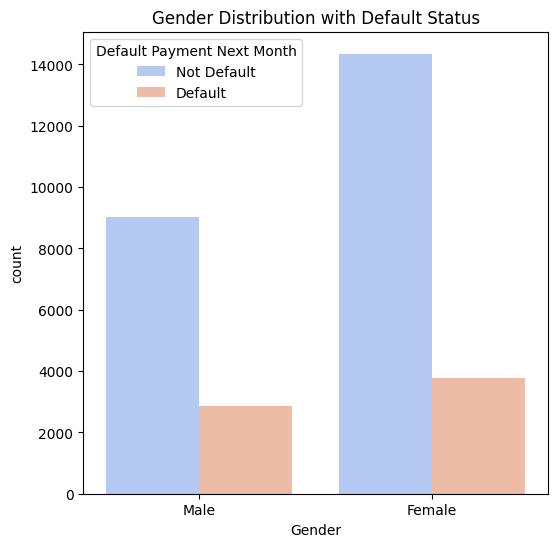

In [ ]:
# Assuming 'default.payment.next.month' is the column indicating default status
plt.figure(figsize=(6,6))
sns.countplot(x='SEX', hue='default.payment.next.month', data=df, palette='coolwarm')
plt.xticks([0,1], labels=["Male", "Female"])
plt.xlabel('Gender')
plt.title("Gender Distribution with Default Status")
plt.legend(title='Default Payment Next Month', labels=['Not Default', 'Default'])
plt.show()

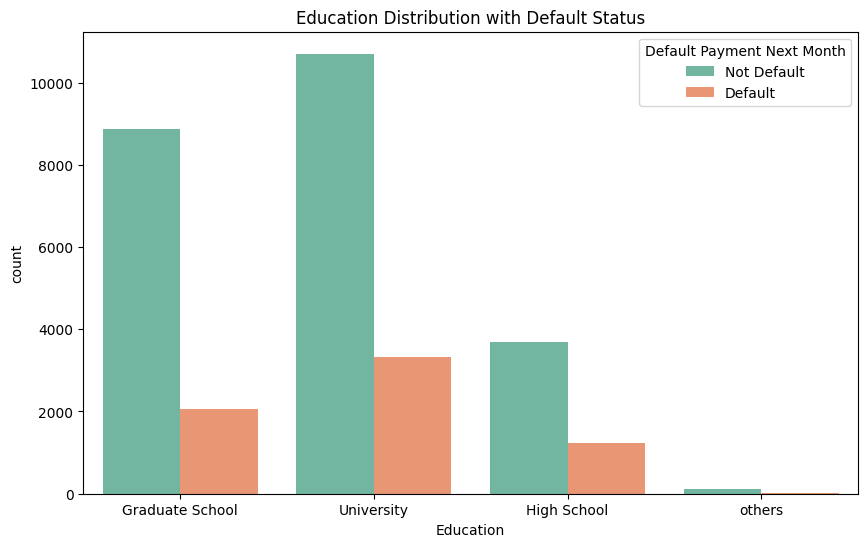

In [ ]:
# With EDUCATION columns
# (1=graduate school, 2=university, 3=high school, 4=others)
plt.figure(figsize=(10,6))
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=df, palette='Set2')
plt.xticks(ticks=[0, 1, 2, 3], labels=["Graduate School", "University", "High School", "others"])
plt.xlabel('Education')
plt.title("Education Distribution with Default Status")
plt.legend(title='Default Payment Next Month', labels=['Not Default', 'Default'])
plt.show()

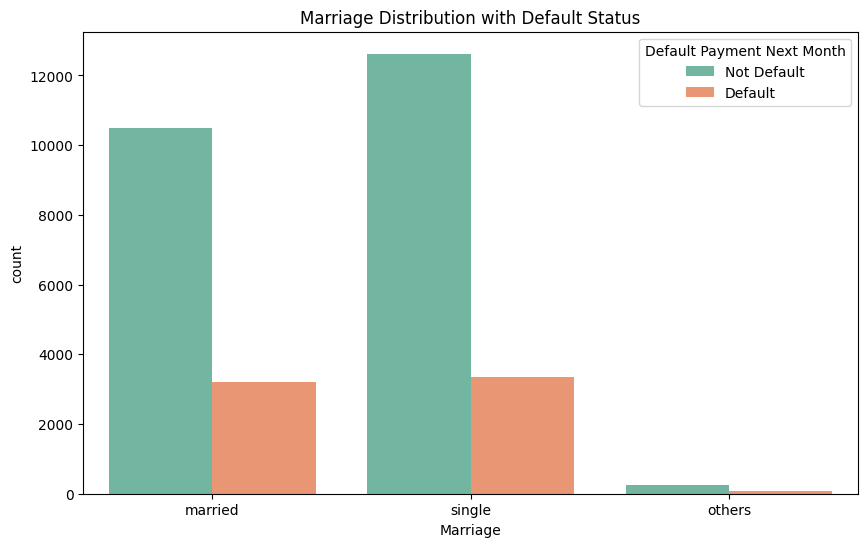

In [ ]:
# With MARRIAGE columns
# (0=married, 1=single, 2=others)
plt.figure(figsize=(10,6))
sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=df, palette='Set2')
plt.xticks(ticks=[0, 1, 2], labels=["married", "single", "others"])
plt.xlabel('Marriage')
plt.title("Marriage Distribution with Default Status")
plt.legend(title='Default Payment Next Month', labels=['Not Default', 'Default'])
plt.show()

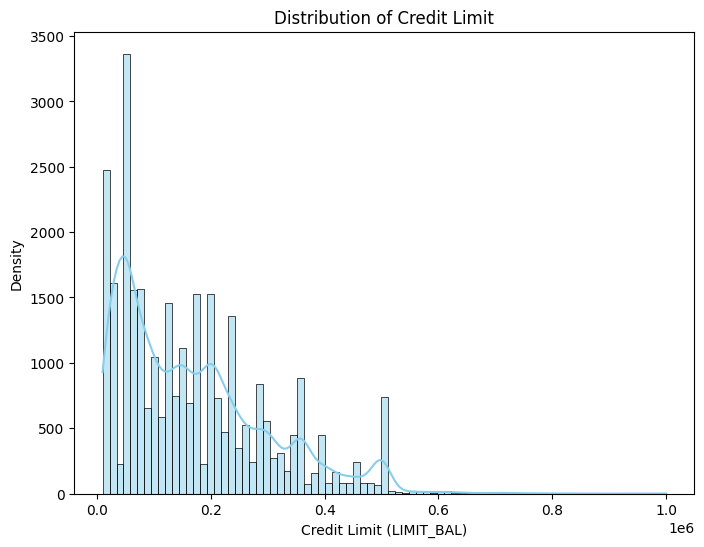

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['LIMIT_BAL'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Credit Limit (LIMIT_BAL)')
plt.ylabel('Density')
plt.title('Distribution of Credit Limit')
plt.show()

<ipython-input-24-d9203ff79f92>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


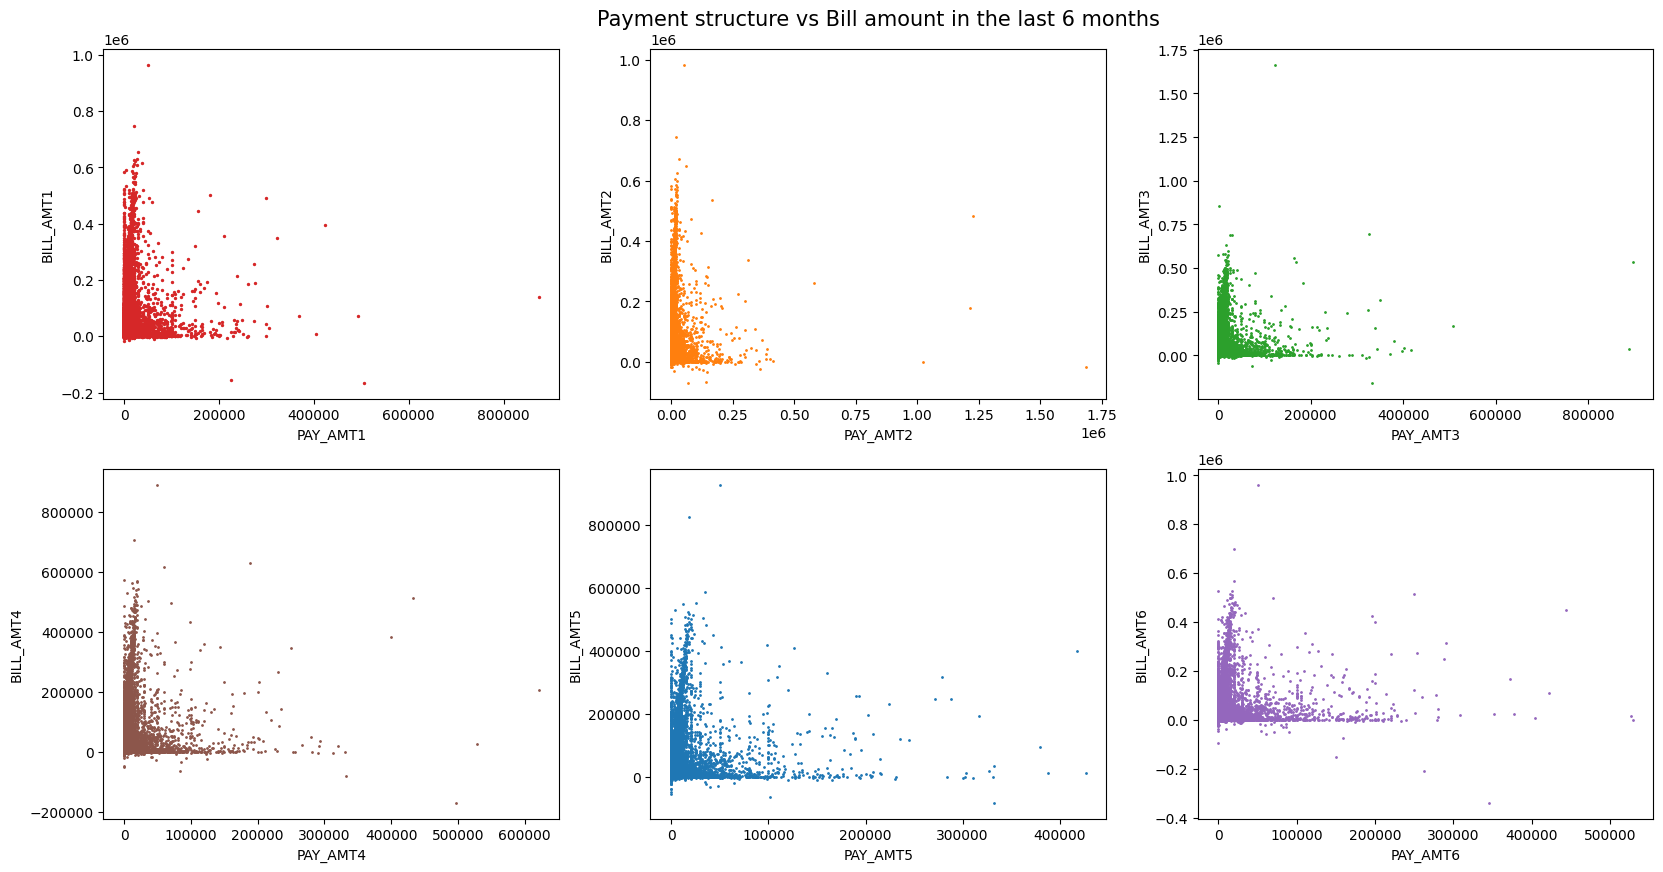

In [ ]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='tab:red', s=2)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='tab:orange', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='tab:green', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='tab:brown', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='tab:blue', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c ='tab:purple', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')

plt.show()



## Creating Independent features and dependent features


In [ ]:
# independent features
X= df.drop(["default.payment.next.month"], axis =1)
# dependent features
y = df["default.payment.next.month"]
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


#Scalling the features
####So, scalling the independent features are very important so that our model is not biased toward the higher range of values. To make all features in same range
####Here we are using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,
                                                    random_state=42)


#Balancing the data

#### Balancing the Dataset: By repeating this process for multiple minority class instances, SMOTE increases the number of minority class examples, effectively balancing the dataset between the minority and majority classes.

####For example, suppose you have a dataset with 90% majority class instances and 10% minority class instances. After applying ***SMOTE(Synthetic Minority Over-sampling Technique)***, the number of minority class instances may increase, making the dataset more balanced, such as having 50% minority class instances and 50% majority class instances.

In [ ]:
from sklearn.utils import resample
from collections import Counter

# Resample the minority class using random oversampling
X_train_resampled, y_train_resampled = resample(X_train[y_train == 1],
                                                y_train[y_train == 1],
                                                replace=True,
                                                n_samples=X_train[y_train == 0].shape[0],
                                                random_state=42)

# Concatenate the resampled data with the majority class
X_train_resampled = np.concatenate((X_train[y_train == 0], X_train_resampled))
y_train_resampled = np.concatenate((y_train[y_train == 0], y_train_resampled))

# summarize class distribution
print("Before oversampling:", Counter(y_train))
print("After oversampling:", Counter(y_train_resampled))


Before oversampling: Counter({0: 18677, 1: 5323})
After oversampling: Counter({0: 18677, 1: 18677})


#Building Model
###Logistic Regression
####Random Forest Classifier
####XGBoost Classifier
####Support vector machine classifier
####Logistic regression Model:

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#predicting the model
pred_logit = logit.predict(X_test)

##Evaluation Matrix

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.811
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.24      0.36      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



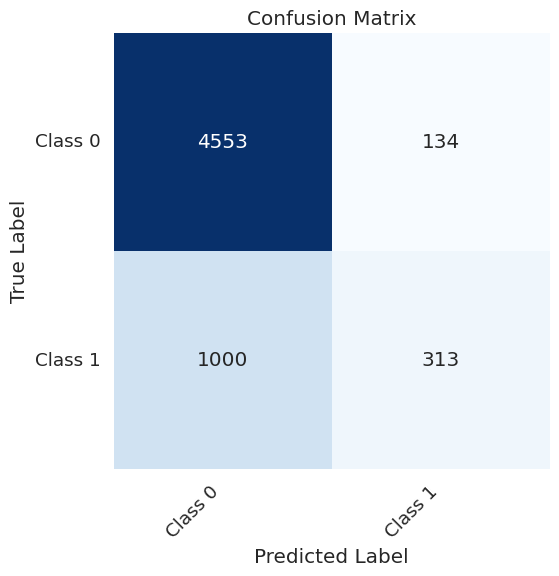

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_custom(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """
    Plot confusion matrix using matplotlib.
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a figure and an axis
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font size for better readability
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, square=True,
                xticklabels=classes, yticklabels=classes)

    # Add labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Show plot
    plt.tight_layout()
    plt.show()

# Usage
plot_confusion_matrix_custom(y_test, pred_logit, classes=['Class 0', 'Class 1'])


####TN (True Negative): 3242

True negatives are instances where the model correctly predicted the negative class (Class 0) when the true class was also negative. In this case, the model correctly classified 3242 instances as negative.
FP (False Positive): 1445

False positives are instances where the model incorrectly predicted the positive class (Class 1) when the true class was negative (Class 0). In this case, the model incorrectly classified 1445 instances as positive when they were actually negative.
FN (False Negative): 445

False negatives are instances where the model incorrectly predicted the negative class (Class 0) when the true class was positive (Class 1). In this case, the model incorrectly classified 445 instances as negative when they were actually positive.
TP (True Positive): 868

True positives are instances where the model correctly predicted the positive class (Class 1) when the true class was also positive. In this case, the model correctly classified 868 instances as positive.
Here's a breakdown of the interpretation:

Accuracy: It's the overall correctness of the model, calculated as the ratio of correctly classified instances (TP + TN) to the total number of instances.

Precision: It measures the model's ability to correctly identify positive instances, calculated as TP / (TP + FP). Higher precision indicates fewer false positives.

Recall (Sensitivity): It measures the model's ability to correctly identify all positive instances, calculated as TP / (TP + FN). Higher recall indicates fewer false negatives.

F1-score: It combines precision and recall into a single metric, calculated as the harmonic mean of precision and recall. It provides a balanced measure of the model's performance.

Specificity: It measures the model's ability to correctly identify all negative instances, calculated as TN / (TN + FP). Higher specificity indicates fewer false positives.

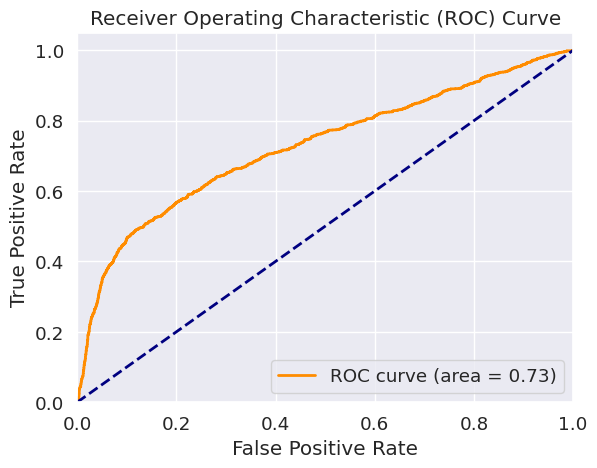

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming logit is your trained logistic regression model,
# X_test is the independent features of the test dataset,
# y_test is the true labels of the test dataset
y_scores = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

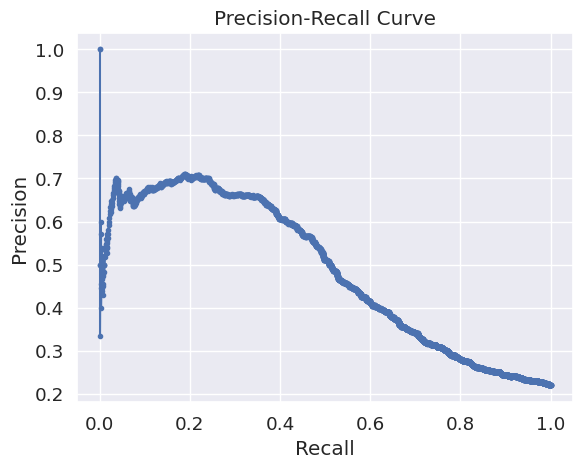

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Assuming logit is your trained logistic regression model,
# X_test is the independent features of the test dataset,
# y_test is the true labels of the test dataset
y_scores = logit.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predicting the model
pred_rf= rf.predict(X_test)

##Evaluating the model

In [ ]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

The accuracy of logit model is: 0.8148333333333333
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.64      0.35      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.67      6000
weighted avg       0.80      0.81      0.79      6000



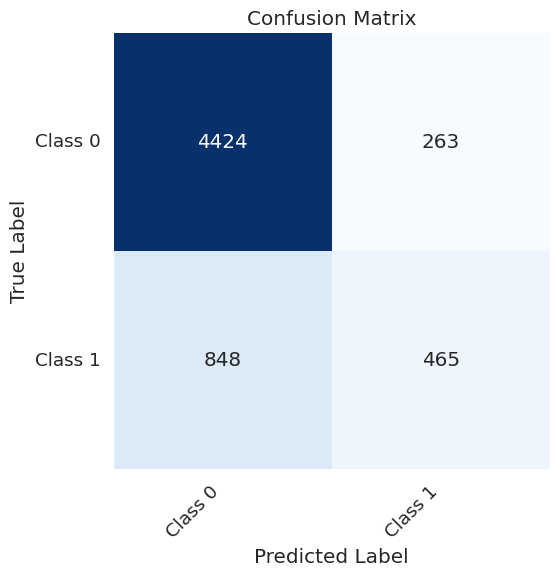

In [ ]:
def plot_confusion_matrix_custom(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """
    Plot confusion matrix using matplotlib.
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a figure and an axis
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font size for better readability
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, square=True,
                xticklabels=classes, yticklabels=classes)

    # Add labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Show plot
    plt.tight_layout()
    plt.show()

# Usage
plot_confusion_matrix_custom(y_test, pred_rf, classes=['Class 0', 'Class 1'])


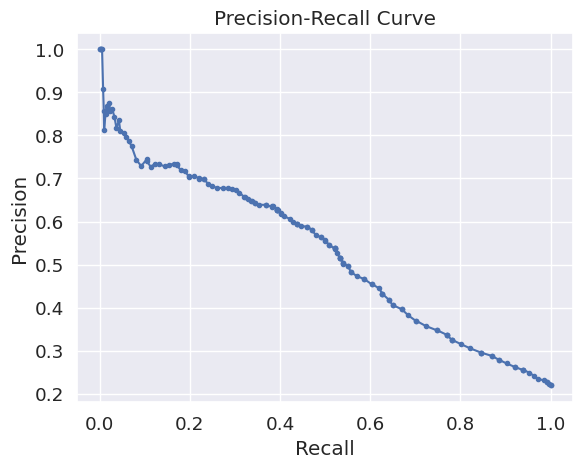

In [ ]:
# Assuming logit is your trained logistic regression model,
# X_test is the independent features of the test dataset,
# y_test is the true labels of the test dataset
y_scores = rf.predict_proba(X_test)[:,1]

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


#####Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. It represents the accuracy of the positive predictions. Precision is plotted on the y-axis.

Recall (Sensitivity): Recall, also known as sensitivity or true positive rate, measures the proportion of true positives that were correctly identified by the model out of all actual positives in the dataset. Recall is plotted on the x-axis.

Curve Shape: The Precision-Recall curve typically starts from the point (0,0) and moves towards the upper right corner of the plot. A curve closer to the upper right corner indicates better performance of the model, as it achieves high precision and high recall simultaneously.

Thresholds: Each point on the curve corresponds to a specific threshold used for classifying instances as positive or negative. The curve shows how precision and recall change as the threshold varies.

Interpretation: You can use the Precision-Recall curve to choose the appropriate threshold for your model based on your specific requirements. For example, if you prioritize precision over recall, you may want to select a threshold that maximizes precision while still maintaining an acceptable level of recall.

Overall, the Precision-Recall curve provides valuable insights into the performance of a binary classification model, especially when the classes are imbalanced or when the cost of false positives and false negatives varies.







## XGBoost Classifier

In [ ]:
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

##Evaluating the model

In [ ]:
print("The accuracy of logit model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))

The accuracy of logit model is: 0.8141666666666667
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.63      0.37      0.46      1313

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.80      6000



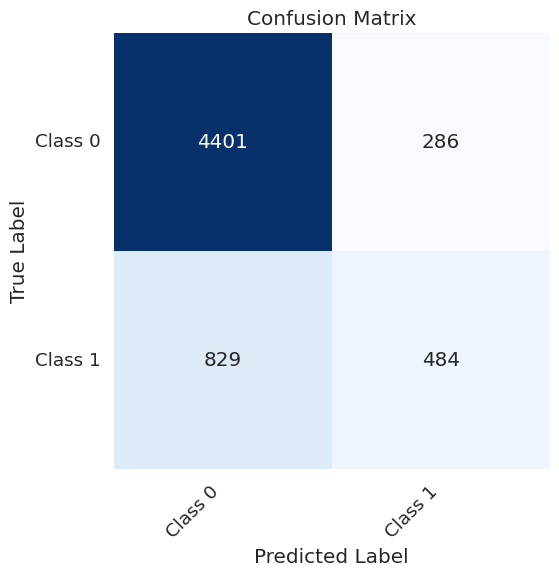

In [ ]:
def plot_confusion_matrix_custom(y_true, y_pred, classes, cmap=plt.cm.Blues):
    """
    Plot confusion matrix using matplotlib.
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Create a figure and an axis
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust font size for better readability
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, square=True,
                xticklabels=classes, yticklabels=classes)

    # Add labels and title
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Show plot
    plt.tight_layout()
    plt.show()

# Usage
plot_confusion_matrix_custom(y_test, xgb_predict, classes=['Class 0', 'Class 1'])

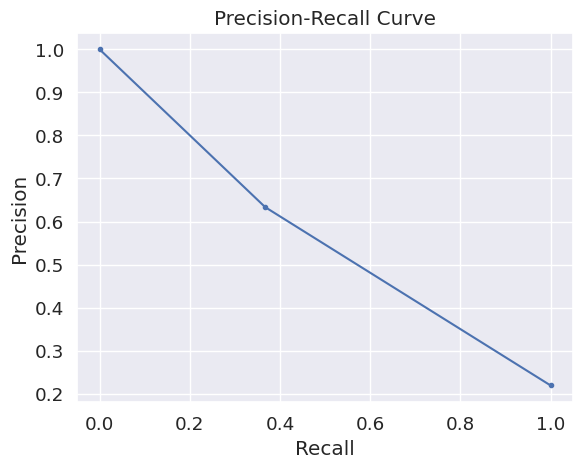

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming xgb is your trained XGBoost model,
# X_test is the independent features of the test dataset,
# y_test is the true labels of the test dataset

# Train a new XGBoost model with a different objective that outputs raw scores
xgb_raw_scores = xgb.XGBClassifier(objective='reg:squarederror')
xgb_raw_scores.fit(X_train, y_train)

# Get predicted raw scores
y_scores_raw = xgb_raw_scores.predict(X_test)

# Apply sigmoid function to convert raw scores to probabilities
y_scores_proba = 1 / (1 + np.exp(-y_scores_raw))

precision, recall, _ = precision_recall_curve(y_test, y_scores_proba)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


#Hyperparameter tunning

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
# Finding the best estimators
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Finding the best param
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.3}

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the XGBClassifier and its parameters
classifier = xgb.XGBClassifier(objective='binary:logistic',
                                gamma=0.2,
                                learning_rate=0.15,
                                max_depth=15,
                                reg_lambda=10,
                                subsample=0.8,
                                colsample_bytree=0.8,
                                random_state=42)

# Train the classifier on the training data
classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.8021666666666667
Precision: 0.5551663747810858
Recall: 0.48286367098248284
F1 Score: 0.5164969450101833


In [ ]:
# Predicting model
y_pred= classifier.predict(X_test)

#Evaluating the model after hyperparameter tuning

In [ ]:
print("The accuracy of the model is:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

The accuracy of the model is: 0.8021666666666667
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4687
           1       0.56      0.48      0.52      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.69      0.70      6000
weighted avg       0.79      0.80      0.80      6000



In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

In [ ]:
score

array([0.80366667, 0.803     , 0.80666667, 0.80733333, 0.814     ,
       0.81866667, 0.827     , 0.82566667, 0.82033333, 0.81533333])

In [ ]:
score.mean()

0.8141666666666667